In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from sklearn.preprocessing import StandardScaler  # for normalize the model

from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE


In [2]:
data=pd.read_csv('happiness_score_dataset.csv')  # read the data
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Togo                1
Luxembourg          1
Congo (Kinshasa)    1
India               1
Malawi              1
                   ..
Kenya               1
Spain               1
Argentina           1
Tunisia             1
Belgium             1
Name: Country, Length: 158, dtype: int64

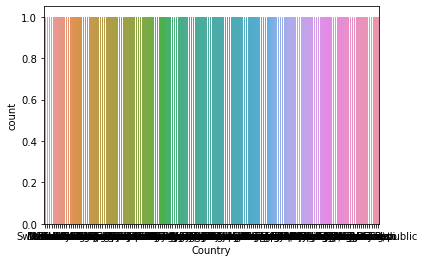

In [5]:
#Check the count of Country
ax=sns.countplot(x="Country", data=data)
data["Country"].value_counts()

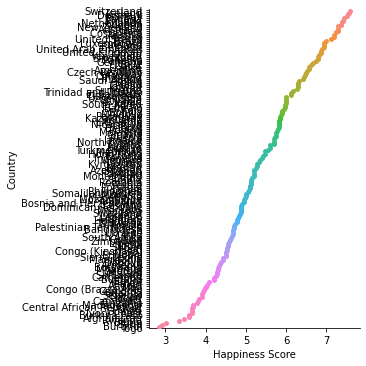

In [7]:
sns.catplot(x="Happiness Score", y="Country",data=data)

In [8]:
data.shape # check the no. of rows & column

(158, 12)

In [9]:
data=data.drop(columns=['Dystopia Residual','Standard Error','Region']) # dropping irrelevant columns

In [10]:
data.describe()   #understand data at high level check the stastics of dataset

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [11]:
data.isna().sum() #finding the count of missing value

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [13]:
data.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


In [14]:
data.info() #printing the summary of data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [15]:
data.drop_duplicates(inplace=True) #remove duplicates if any

In [16]:
data.shape #its look like no duplicates was present 

(158, 9)

[[<AxesSubplot:title={'center':'Happiness Rank'}>
  <AxesSubplot:title={'center':'Happiness Score'}>
  <AxesSubplot:title={'center':'Economy (GDP per Capita)'}>]
 [<AxesSubplot:title={'center':'Family'}>
  <AxesSubplot:title={'center':'Health (Life Expectancy)'}>
  <AxesSubplot:title={'center':'Freedom'}>]
 [<AxesSubplot:title={'center':'Trust (Government Corruption)'}>
  <AxesSubplot:title={'center':'Generosity'}> <AxesSubplot:>]]


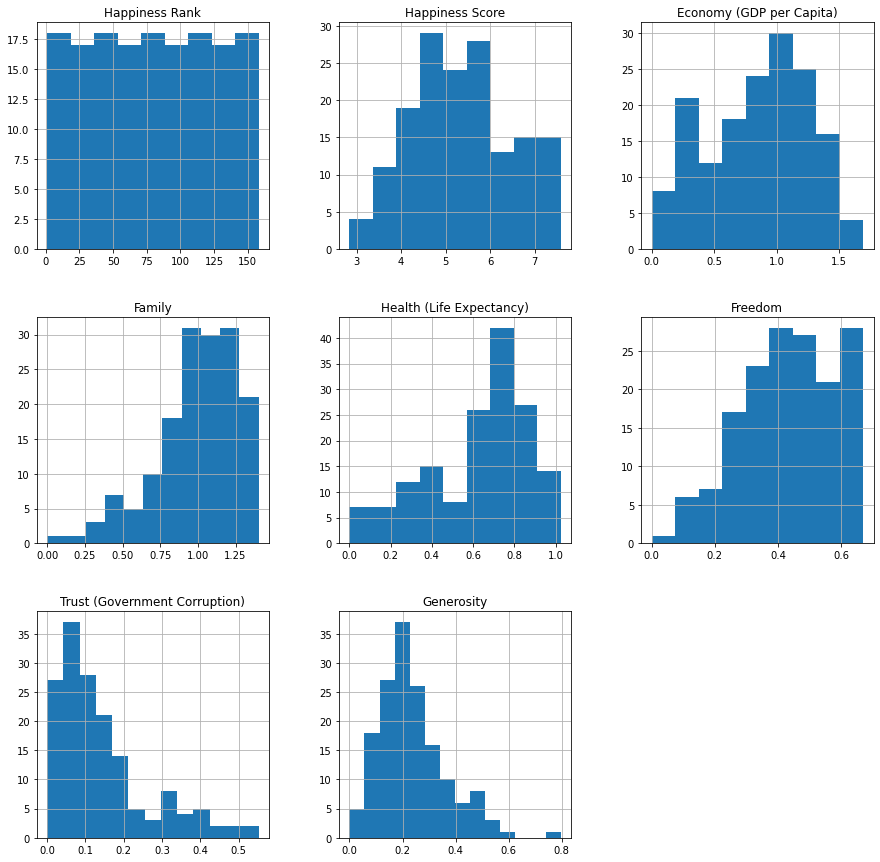

In [17]:
#Let's see the how data is distributed or Graphical analysis

print(data.hist(bins='auto', figsize=(15,15)))


Happiness Rank                      AxesSubplot(0.125,0.125;0.0824468x0.755)
Happiness Score                  AxesSubplot(0.223936,0.125;0.0824468x0.755)
Economy (GDP per Capita)         AxesSubplot(0.322872,0.125;0.0824468x0.755)
Family                           AxesSubplot(0.421809,0.125;0.0824468x0.755)
Health (Life Expectancy)         AxesSubplot(0.520745,0.125;0.0824468x0.755)
Freedom                          AxesSubplot(0.619681,0.125;0.0824468x0.755)
Trust (Government Corruption)    AxesSubplot(0.718617,0.125;0.0824468x0.755)
Generosity                       AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

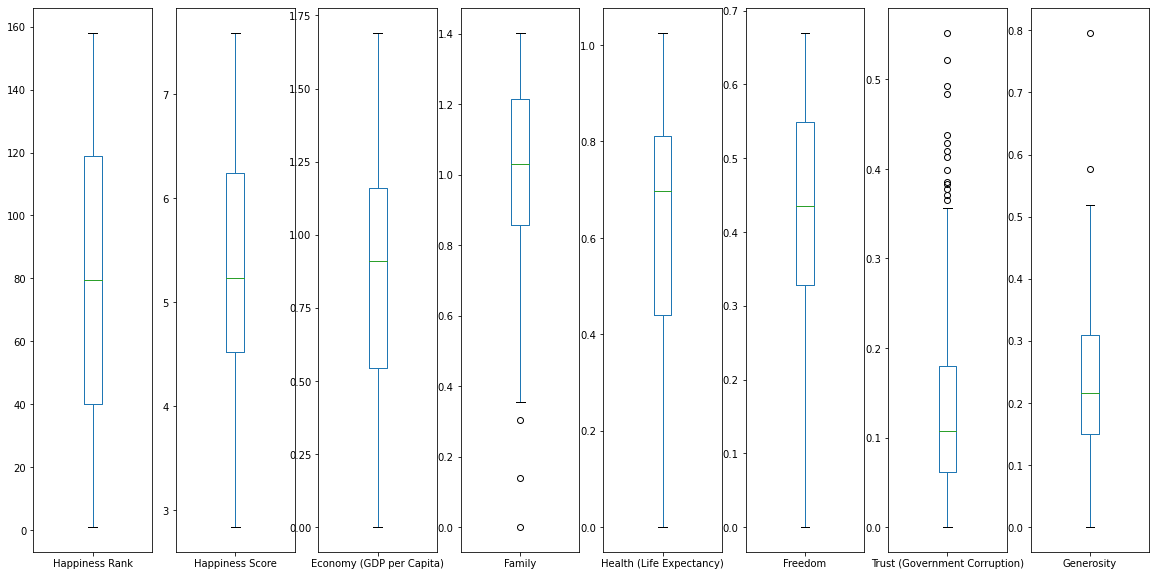

In [18]:
# from the graph we can see some outliers in some colomuns lets check with box plot again
data.plot(kind='box', subplots=True, figsize=(20,10))

In [25]:
from scipy.stats import zscore # to remove outliers

In [26]:
#Let's remove outliers from family ,Trust (Government Corruption) and Generosity
z_score=zscore(data[['Family','Trust (Government Corruption)','Generosity']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)

In [27]:
data=data[filtering_entry]

In [28]:
data.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


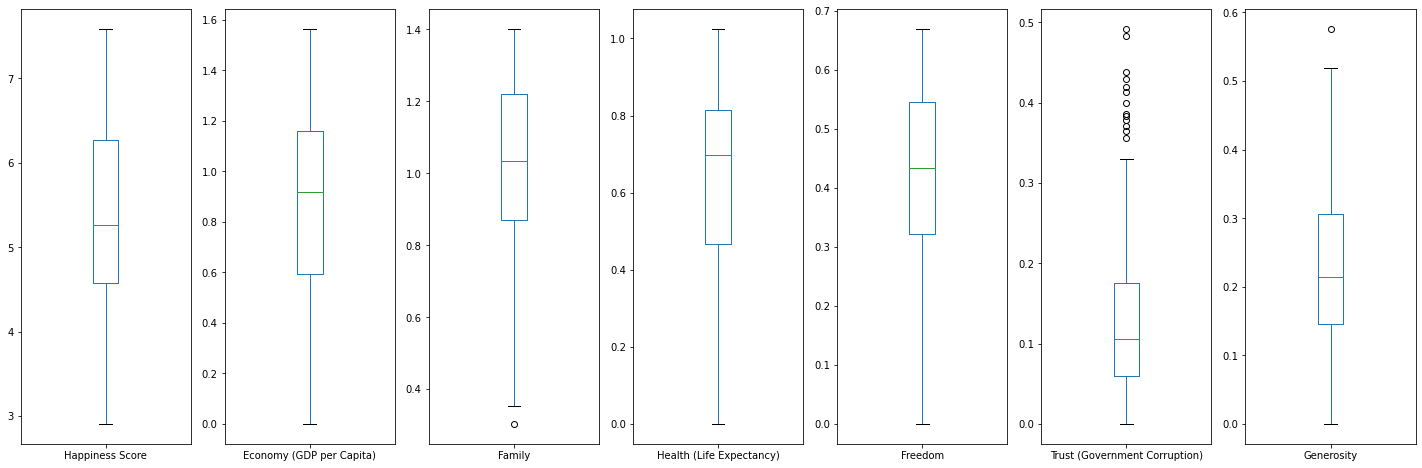

In [29]:
#plot again after removing outliers
data[['Happiness Score', 'Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']].plot(kind='box', subplots=True, figsize=(25,8));

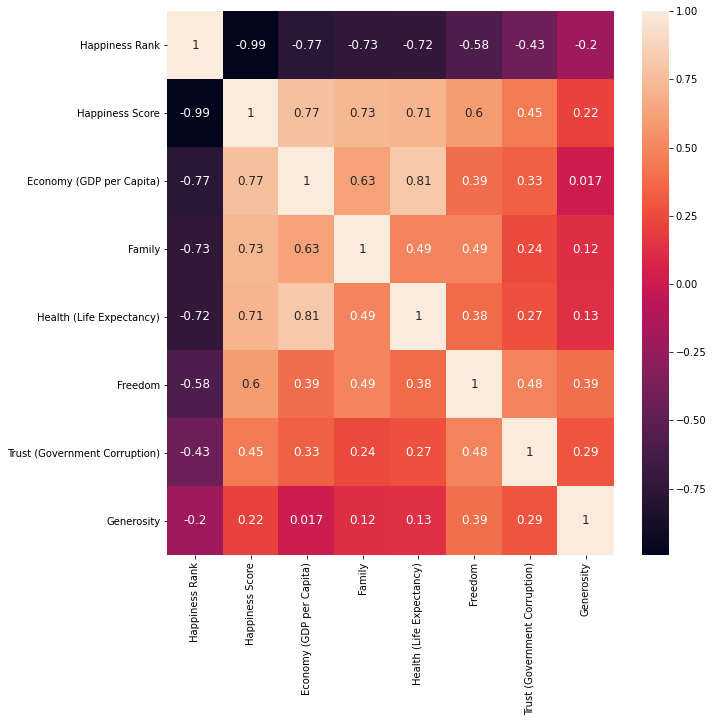

In [30]:
#check multicolinearity 
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12})
plt.show()

In [31]:
#from heatmap we can see their is strong corelation in Economy (GDP per Capita)	& Health (Life Expectancy) 81% and negative relation between happiness rank and happiness score so we drop happiness rank
data=data.drop(columns=['Happiness Rank'])
data.head(2)

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630


In [32]:
data.shape

(153, 8)

In [33]:
data.rename(columns={'Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health'}, inplace=True) #as not able to plot

In [34]:
data.columns

Index(['Country', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

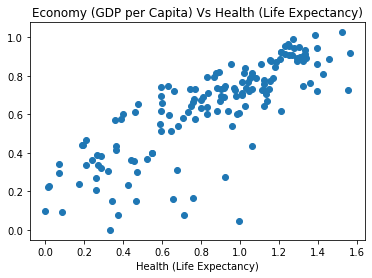

In [35]:
# now plot the relation between Economy (GDP per Capita) & Health (Life Expectancy)

plt.scatter(data.Economy,data.Health)
plt.xlabel('Economy (GDP per Capita)')
plt.xlabel('Health (Life Expectancy)')
plt.title('Economy (GDP per Capita) Vs Health (Life Expectancy)')

plt.show()


In [ ]:
#still i m not sure and dont want to loose data so i m not deleting it

In [38]:
# Let's Seperate the data 
x=data.drop(columns=['Happiness Score'])
y=data['Happiness Score']

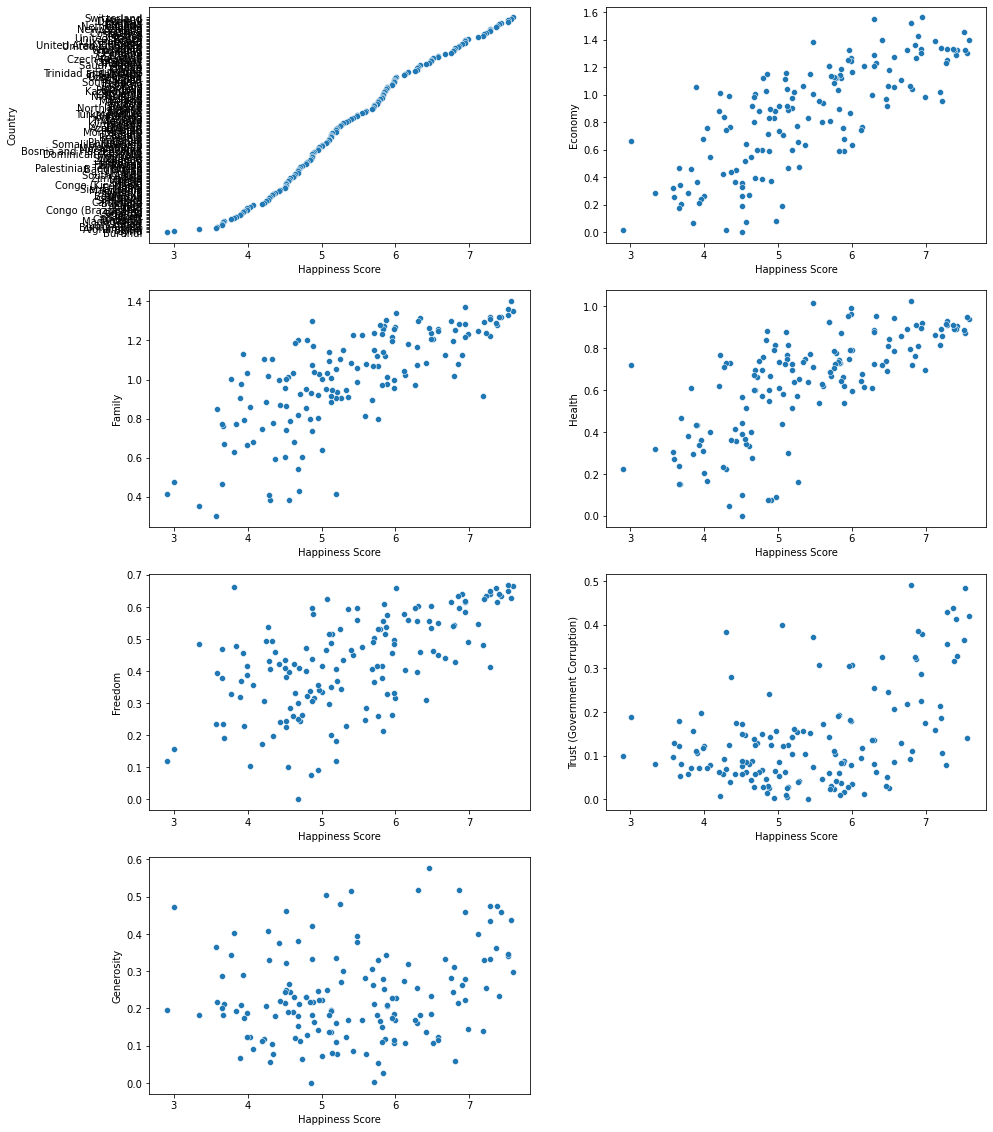

In [39]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

In [59]:
# Looking at above graphs their is almost linare relationship between all features with Happiness score except Generosity and Trust. Hence,we can build linear regression
x=data.drop(columns=['Happiness Score','Country','Trust (Government Corruption)', 'Generosity'])
y=data['Happiness Score']

In [60]:
#Training the Model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

# Ada boost model Training

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [70]:
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

y_pred=ada.predict(x_train)

metrics.r2_score(y_train,y_pred)

0.8958529024888923

In [72]:
y_test_pred=ada.predict(x_test)

metrics.r2_score(y_test,y_test_pred)

0.6791539457868121

# Hyper tuning by using RandomSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [84]:
dt=DecisionTreeRegressor()

para={'n_estimators':[20,10,30],'learning_rate':[0.25,0.1,0.01]}

rand_scv=RandomizedSearchCV(ada,cv=5,param_distributions=para)

In [85]:
rand_scv.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                               learning_rate=0.25,
                                               n_estimators=20),
                   param_distributions={'learning_rate': [0.25, 0.1, 0.01],
                                        'n_estimators': [20, 10, 30]})

In [86]:
rand_scv.best_estimator_

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=20)

In [87]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.1, n_estimators=20)

ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)



In [88]:
metrics.r2_score(y_test,y_pred)

0.722026100894595

In [89]:
#lets check same parameter on test model

ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.1, n_estimators=20)

ada.fit(x_train,y_train)

y_pred=ada.predict(x_train)


In [90]:
metrics.r2_score(y_train,y_pred)

0.995012595225653